### Importing modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

## null values 

In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

##  Data-types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [8]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


# EDA 
### Year counts

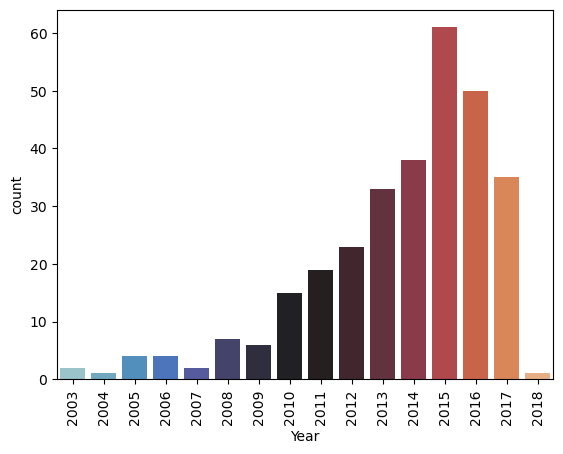

In [9]:
sns.countplot(data=df,x="Year",palette="icefire")
plt.xticks(rotation=90)
plt.show()

### Fuel_Type

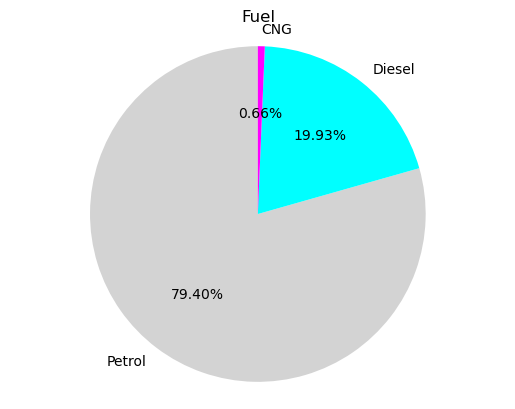

In [11]:
labels=['Petrol','Diesel','CNG']

plt.pie(df['Fuel_Type'].value_counts(),
        autopct='%1.2f%%',
        labels=labels,
        colors=['lightgray','cyan','magenta'],
        startangle=90)

plt.title('Fuel')
plt.axis('equal')
plt.show()

### Selling_type

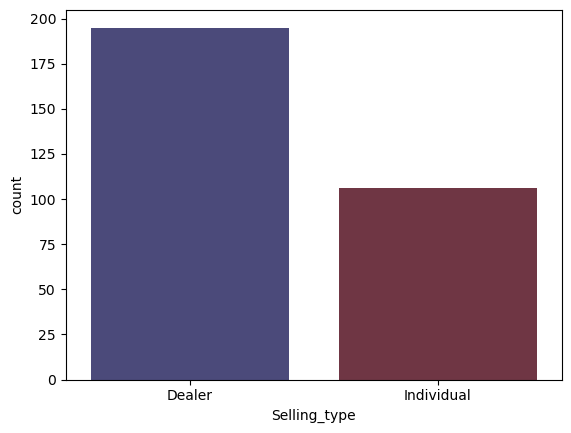

In [12]:
sns.countplot(data=df,x="Selling_type",palette="icefire")
plt.show()

### Transmission

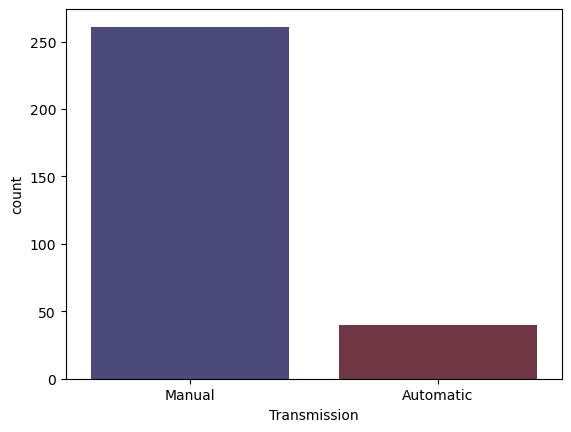

In [13]:
sns.countplot(data=df,x="Transmission",palette="icefire")
plt.show()

In [14]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Categorical to Num 

In [15]:
# df.replace({'Fuel_Type':{'Petrol':0 , 'Diesel':1 , 'CNG':2}} , inplace=True)
# df.replace({'Seller_Type' :{ 'Dealer' :0 , 'Individual':1}} ,inplace=True)
# df.replace({'Transmission' : {'Manual':0 ,'Automatic':1 }} , inplace =True)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [18]:
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['Fuel_Type'].unique()

array([2, 1, 0])

In [19]:
df['Selling_type'].value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [20]:
df['Selling_type']=le.fit_transform(df['Selling_type'])
df['Selling_type'].unique()

array([0, 1])

In [21]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [22]:
df['Transmission']=le.fit_transform(df['Transmission'])
df['Transmission'].unique()

array([1, 0])

In [23]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [24]:
df['Car_Name'].nunique()

98

In [25]:
df = df.drop('Car_Name',
             axis=1)

In [26]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


## correlation 

<AxesSubplot:>

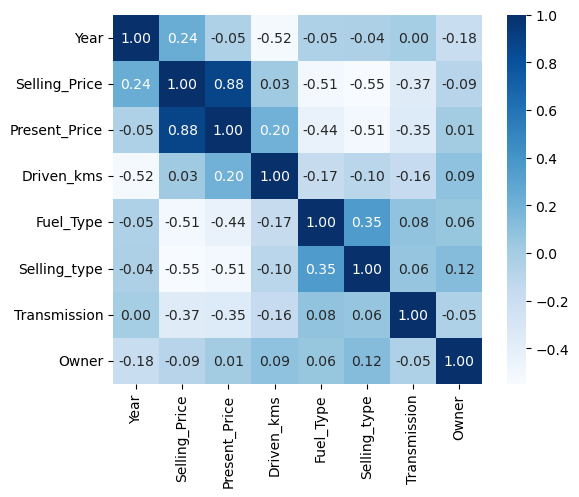

In [27]:
sns.heatmap(df.corr(),
            cmap='Blues',
            annot=True,
            fmt='.2f',
            square=True)

## Feature Selection

In [28]:
X = df[['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type','Transmission']]
X.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,2014,5.59,27000,2,0,1
1,2013,9.54,43000,1,0,1
2,2017,9.85,6900,2,0,1
3,2011,4.15,5200,2,0,1
4,2014,6.87,42450,1,0,1


In [29]:
y = df['Selling_Price']
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.33, 
                                                   random_state=42)

## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [33]:
lr.fit(X_train,
      y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(X_test)
y_pred

array([ 2.48384186,  8.49941168,  6.01915151, -0.69445053,  9.16872339,
        7.14145625,  1.22823086,  0.93535775,  1.36972856,  7.20476438,
        9.2629216 ,  0.42134864,  8.33213431,  3.19084108,  6.62017679,
        2.72839164,  0.57027218, 11.0929011 ,  1.80581401,  2.49104508,
        0.45752217,  8.08935256,  6.49469365,  2.85076189,  0.69153297,
        3.72599643,  5.06078651,  2.77145204,  2.17256293,  1.72214828,
        0.41380271,  8.6722062 , -0.73360439,  2.11553015,  8.29424201,
        4.50473542,  6.89488024,  7.41752628,  2.64930728,  7.9362994 ,
        3.66696366,  2.97066722,  4.51641972,  0.3204874 ,  7.15902747,
        0.32008294,  7.31203389, 10.57561744,  3.19447315,  5.00934643,
        6.46647198,  2.29111343, 20.19686143, 16.79629637,  7.02534463,
        9.43245202,  4.80190719,  8.80442007,  1.75594332,  7.46476332,
        0.08245615, -1.49077522,  2.07330215, -1.88689317,  4.74312252,
        1.88193374, 19.95664202, 17.97012601,  5.61778232, -1.28

In [35]:
lr.coef_

array([ 3.43306799e-01,  4.38692344e-01, -1.71812319e-05, -1.57769886e+00,
       -1.34847378e+00, -1.27276485e+00])

In [36]:
lr.intercept_

-684.956497802273

In [37]:
print('MSE',mean_squared_error(y_test,y_pred))
print('R2',r2_score(y_test,y_pred))

MSE 3.813711027100027
R2 0.8574419508195438
